<img style="float: right;" width="120" src="http://neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<br><br><br>

# Matplotlib

`%matplotlib` inline` is a **magic** command.<br>
It means when plotting matplotlib charts, embed them directly into the notebook

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

# Load some data into a DataFrame to demonstrate plotting with
df = pd.read_excel(io="https://neueda.conygre.com/pydata/plotting_data.xls", sheet_name='tips', index_col='ID')

print(df.shape)
df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
ID,,,,,,,
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Pandas Plotting Functions

Pandas comes with its own in-built plotting function<br>
General format is usually
- `DataFrame.plot.PLOT_TYPE` <br>
- `Series.plot.PLOT_TYPE`

## Histograms

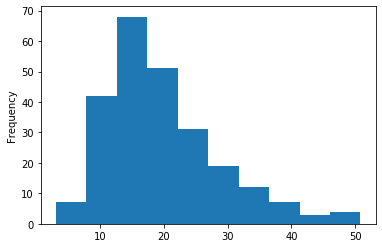

In [3]:
# a series
df['total_bill'].plot.hist()

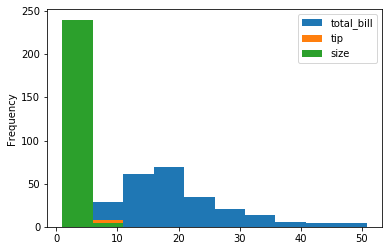

In [4]:
# an entire DataFrame
df.plot.hist()

## Scatterplot

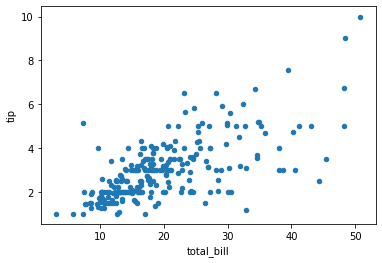

In [7]:
df.plot.scatter(x='total_bill', y='tip')

## Hexbin

Use `gridsize` argument where appropriate

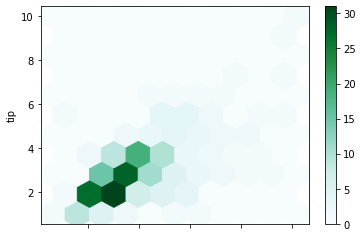

In [8]:
df.plot.hexbin(x='total_bill', y='tip', gridsize=10)

## Box plot


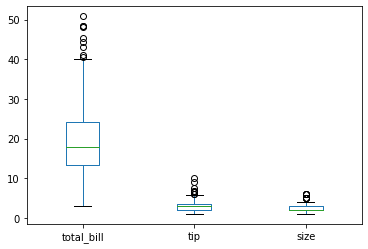

In [9]:
df.plot.box()

# Examples using matplotlib directly


In [3]:
import matplotlib.pyplot as plt

df.head()

,total_bill,tip,sex,smoker,day,time,size
ID,,,,,,,
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Histograms

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


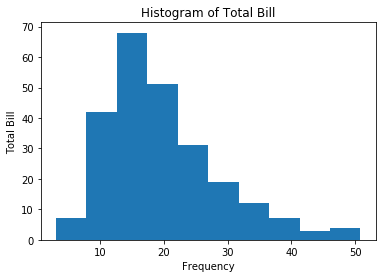

In [11]:
x_data = df['total_bill']

hist_plot = plt.figure()

ax1 = hist_plot.add_subplot(1,1,1)

ax1.hist(x = x_data, bins=10)

ax1.set_title('Histogram of Total Bill')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Total Bill')

hist_plot.show()

## Scatterplot

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


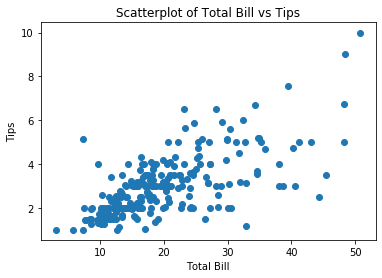

In [12]:
scatter_plot = plt.figure()

x_data = df['total_bill']
y_data = df['tip']

ax1 = scatter_plot.add_subplot(1,1,1)

ax1.scatter(x = x_data, y = y_data)
ax1.set_title('Scatterplot of Total Bill vs Tips')
ax1.set_xlabel('Total Bill')
ax1.set_ylabel('Tips')

hist_plot.show()

## Boxplots

Used when a discrete variable is plotted against a continuous variable

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


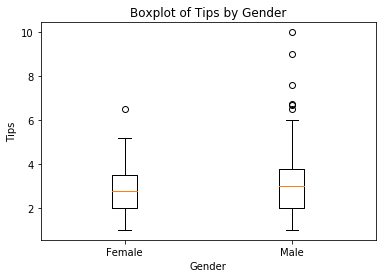

In [13]:
box_plot = plt.figure()

female_tips = df[df['sex'] == 'Female']['tip']
male_tips = df[df['sex'] == 'Male']['tip']

ax1 = box_plot.add_subplot(1,1,1)
ax1.boxplot(x = [female_tips, male_tips], labels=['Female', 'Male'])
ax1.set_title('Boxplot of Tips by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Tips')

box_plot.show()

# Seaborn

In [15]:
import seaborn as sns

## Histograms

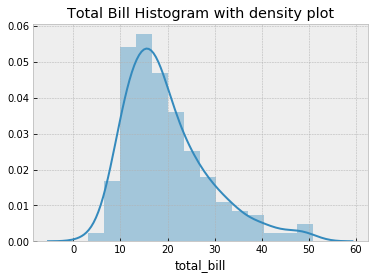

In [16]:
# this subplots function returns 2 values as a tuple
# a figure
# a subplot added to the figure

hist_plot, ax1 = plt.subplots()

ax1 = sns.distplot(a = df['total_bill'])
ax1.set_title('Total Bill Histogram with density plot')

plt.show()

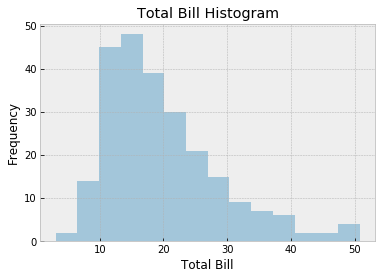

In [17]:
# Same thing but without the denisty
# supply a kde argument and set it to False
hist_plot, ax1 = plt.subplots()

ax1 = sns.distplot(a = df['total_bill'], kde=False)
ax1.set_title('Total Bill Histogram')
ax1.set_xlabel('Total Bill')
ax1.set_ylabel('Frequency')

plt.show()

## Density Pot

**Kernel Density Estimation**

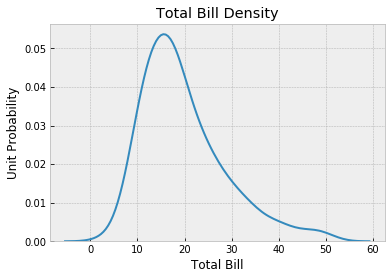

In [18]:
den_plot, ax1 = plt.subplots()

ax1 = sns.distplot(a = df['total_bill'], hist=False)
ax1.set_title('Total Bill Density')
ax1.set_xlabel('Total Bill')
ax1.set_ylabel('Unit Probability')

plt.show()

## Rug Plots

- 1 dimensional representation of a variables distribution
- usually used with other plots to enhance visualization

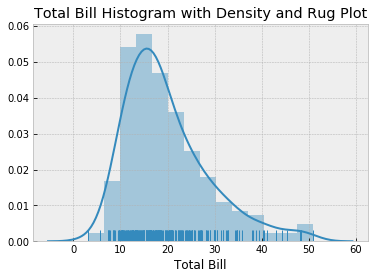

In [19]:
hist_den_rug_plot, ax1 = plt.subplots()

ax1 = sns.distplot(a = df['total_bill'], rug=True)
ax1.set_title('Total Bill Histogram with Density and Rug Plot')
ax1.set_xlabel('Total Bill')

plt.show()

## Bar Plots

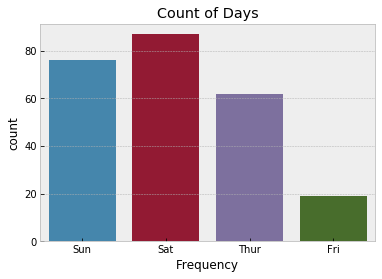

In [20]:
count_plot, ax1 = plt.subplots()

ax1 = sns.countplot(x='day', data=df)
ax1.set_title('Count of Days')
ax1.set_xlabel('Day of Week')
ax1.set_xlabel('Frequency')

plt.show()

## Scatterplot

- No `scatter` function in `seaborn`, use `regplot` instead.
- plots a scatterpoot **and** fits a regression line
- use `fit_reg=False` to toggle regression line on/off

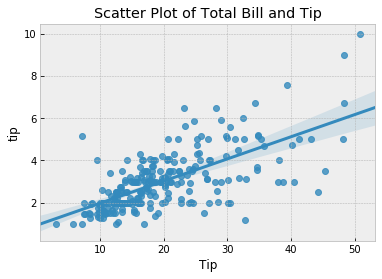

In [21]:
scatter_plot, ax1 = plt.subplots()

ax = sns.regplot(x='total_bill', y='tip', data=df)

ax1.set_title('Scatter Plot of Total Bill and Tip')
ax1.set_xlabel('Total Bill')
ax1.set_xlabel('Tip')

plt.show()

Alternative is to use `lmplot`<br>
`lmplot` calls `regplot`<br>
`lmplot` creates `figures`, `replot` creates axes<br>

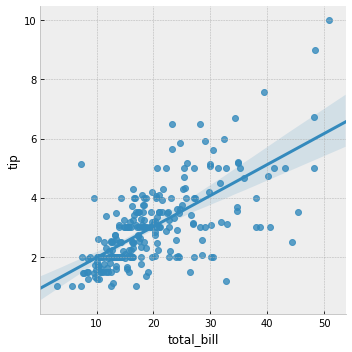

In [22]:
fig = sns.lmplot(x='total_bill', y='tip', data=df)

plt.show()

Or use `jointplot`<br>
`jointplot` creates a scatter that includes a univariate plot on each axis<br>
`jointplot` does not return axes, so no need to create a figure<br>
`jointplot` creates a `JointGrid` object

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

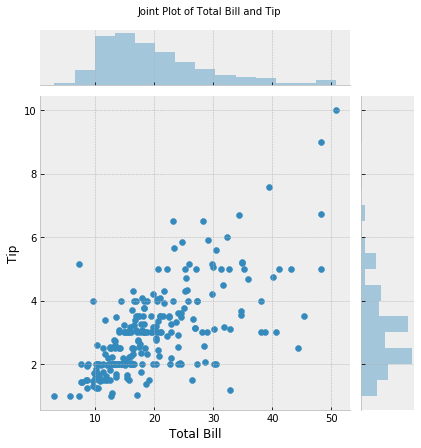

In [23]:
joint_grid = sns.jointplot(x='total_bill', y='tip', data=df)
joint_grid.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint_grid.fig.suptitle(t='Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

# Hexbins

- Group points on a scatter plit into larger points.
- In the same way that a `histogram` can bin a variable to create a `bar`
- `hexbin` can bin variables to create hexagons

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

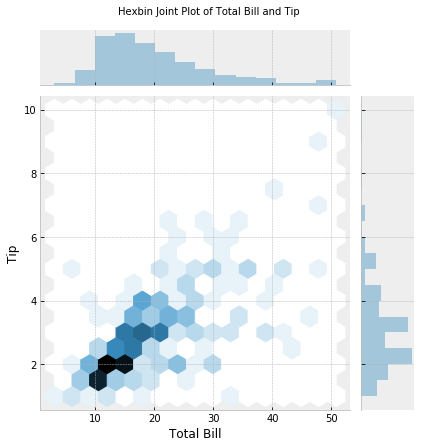

In [24]:
hexbin = sns.jointplot(x="total_bill", y='tip', data=df, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle(t='Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

# 2D Density Plots

- similar to `sns.kdeplot`
- Create a density plot across a bivariate (2 variables)
- Can show just the bivariate
- or show the invividual univariates

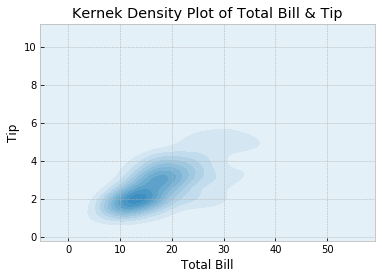

In [25]:
# Just the bivariate
kde, ax1 = plt.subplots()

ax1 = sns.kdeplot(data=df['total_bill'], data2=df['tip'], shade=True) # toggle shade True/False
ax1.set_title('Kernek Density Plot of Total Bill & Tip')
ax1.set_xlabel("Total Bill")
ax1.set_ylabel('Tip')

plt.show()

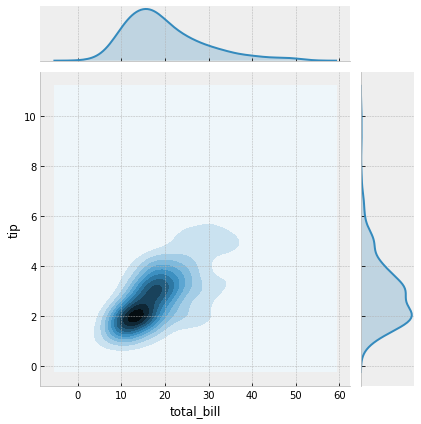

In [26]:
# Include the univariates
kde_joint = sns.jointplot(x='total_bill', y='tip', data=df, kind='kde')

# Bar Plots
Default is to calculate the `mean`<br>
Use the `estimator` parameter to pass in any function<br>

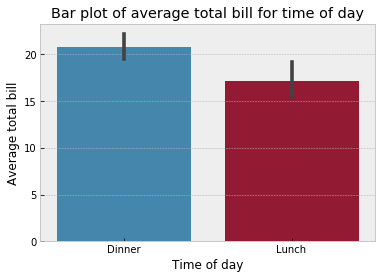

In [27]:
bar, ax1 = plt.subplots()

ax1 = sns.barplot(x='time', y='total_bill', data=df)
ax1.set_title('Bar plot of average total bill for time of day')
ax1.set_xlabel('Time of day')
ax1.set_ylabel('Average total bill')

plt.show()

## Box Plots

- Use to show multiple statistics<br>
- e.g. quartiles, max, min, outliers etc

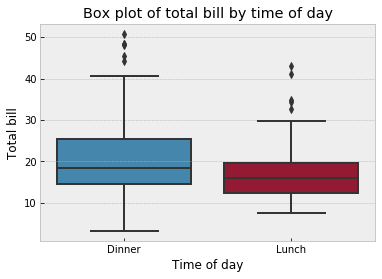

In [28]:
box, ax1 = plt.subplots()

ax1 = sns.boxplot(x='time', y='total_bill', data=df)
ax1.set_title('Box plot of total bill by time of day')
ax1.set_xlabel('Time of day')
ax1.set_ylabel('Total bill')

plt.show()

## Violin Plot

Include the distribution of the data

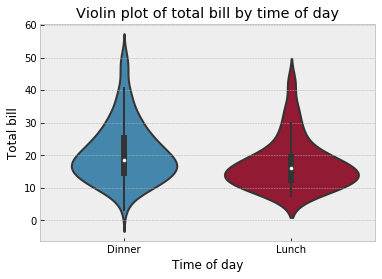

In [29]:
violin, ax1 = plt.subplots()

ax1 = sns.violinplot(x='time', y='total_bill', data=df)
ax1.set_title('Violin plot of total bill by time of day')
ax1.set_xlabel('Time of day')
ax1.set_ylabel('Total bill')

plt.show()

## Pairwise Plots

- `pairplot` visualizes **ALL** pairwise relationships 
- Creates lots of redundant information
- Use `PairGrid` and manually assign plots for the top hald and bottom half

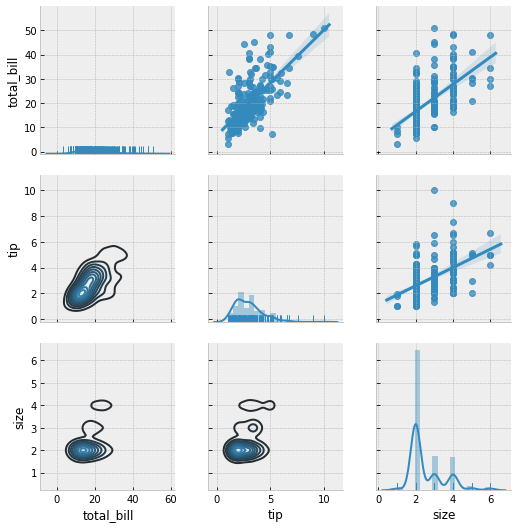

In [30]:
pair_grid = sns.PairGrid(data = df)

pair_grid = pair_grid.map_upper(sns.regplot) # or use plt.scatter
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)

plt.show()